# Introductory applied machine learning (INFR10069)

<div align="right"><font color="blue" size="5">Your Score was 75.0 out of a total of 95.0, or 78.9%</font></div>

# Assignment 1: Data analysis and visualisation

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "01_Analysis.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="01_Analysis.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "01_Analysis.ipynb"
```

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

/afs/inf.ed.ac.uk/user/s16/s1688201/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

## 1. Exploration of the dataset

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

<div align="right"><font color="blue" size="4">4.0/10.0</font></div>

In [2]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(),'datasets','raw_20news.csv')
news_raw = pd.read_csv(data_path,delimiter = ',')
print(news_raw.info())
#print(news_raw.head(5))
#print(news_raw.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB
None


<div align="right"><font color="blue" size="4">1.0</font></div>

(2) ***Your answer goes here:***

The news_raw is a dataframe with 2129 rows and 521 columns. The indices of rows are between 0 to 2256. Every value of this dataframe is a 64-bit int.

Each row is a data instance. Each data instance has 520 attributes and the last column are the class data instances belongs to. 

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

<div align="right"><font color="blue" size="4">3.0/6.0</font></div>

In [3]:
# (1) # Your Code goes here:
news_raw.columns[0:50]

Index(['w1_aaa', 'w2_pins', 'w3_kmr', 'w4_notion', 'w5_queens', 'w6_dwyer',
       'w7_defenseman', 'w8_gld', 'w9_tocchet', 'w10_home', 'w11_buying',
       'w12_internet', 'w13_slots', 'w14_compatible', 'w15_transfer',
       'w16_baltimore', 'w17_mean', 'w18_person', 'w19_performance',
       'w20_support', 'w21_tor', 'w22_gm', 'w23_mouse', 'w24_base',
       'w25_population', 'w26_bob', 'w27_set', 'w28_it', 'w29_earth',
       'w30_faith', 'w31_steve', 'w32_caps', 'w33_printer', 'w34_east',
       'w35_cable', 'w36_adapter', 'w37_mss', 'w38_catcher', 'w39_bullpen',
       'w40_obp', 'w41_innocent', 'w42_european', 'w43_angeles',
       'w44_settings', 'w45_words', 'w46_rit', 'w47_shots', 'w48_ports',
       'w49_vga', 'w50_coverage'],
      dtype='object')

<div align="right"><font color="blue" size="4">2.0</font></div>

(2) ***Your answer goes here:***

The output is a array of 50 objects. They are words appear in the newspaper.

<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 1.3 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. 

1. [Code] Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for the raw dataset. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency to better visualise your model). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise. 
 ***N.B.*** *If for some reason, the alpha parameter does not work for you, then ignore it.*

1. [Text] Mention anything peculiar you observe in the Data.

<div align="right"><font color="blue" size="4">4.0/4.0</font></div>

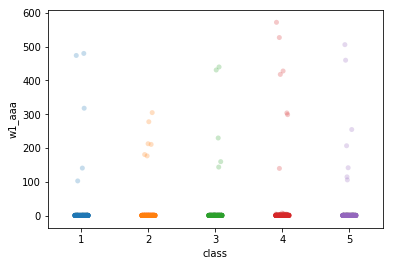

In [4]:
# (1) # Your Code goes here:
sns.stripplot(y='w1_aaa', x = 'class', data = news_raw,jitter=True,alpha=.25)

<div align="right"><font color="blue" size="4">2.0</font></div>

(2) ***Your answer goes here:***

w1_aaa's most occurence in all classes is below 100. But in each class, there are five or sixth outliers ranging from 100 to 600. 

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 1.4  --- [8 marks] ==========
Let us analyse this further. The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of jitter into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. For this, you will be using the function `scatter_jitter` from the `utils` library which we provided. This function takes as input two numpy arrays containing the features of interest. 

1. [Code] First, pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. Do this twice (i.e. pick 4 attributes and do plots between two pairs: you do not need to plot between each possible pair). You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2. Label the axes appropriately.

1. [Text] Do these plots increase or reduce the possibility of the data-set containing outliers? Why or why not? How would you visualise the data to verify this? **N.B. There is no need to code anything for this part, just indicate a reasonable type of plot, and what you expect to see.**

<div align="right"><font color="blue" size="4">6.0/8.0</font></div>

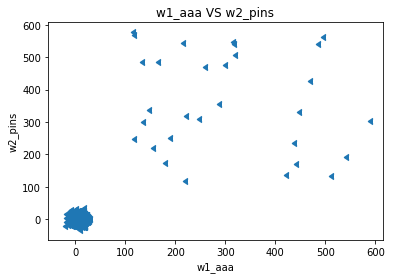

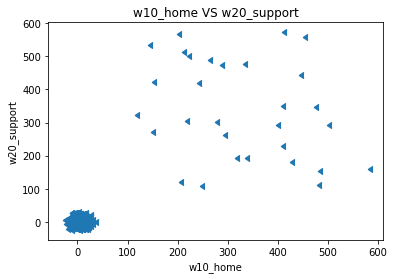

In [5]:
# (1) # Your Code goes here:
#plt.subplot(1,2,1)
scatter_jitter(news_raw.w1_aaa,news_raw.w2_pins,jitter = 0.2)
plt.xlabel('w1_aaa')
plt.ylabel('w2_pins')
plt.title('w1_aaa VS w2_pins')
plt.show()
#plt.subplot(1,2,2)
scatter_jitter(news_raw.w10_home,news_raw.w20_support,jitter = 0.2)
plt.xlabel('w10_home')
plt.ylabel('w20_support')
plt.title('w10_home VS w20_support')
plt.show()

<div align="right"><font color="blue" size="4">4.0</font></div>

(2) ***Your answer goes here:***

Reduce the possibllities. 

Because from this graph, human can see the data in a more straightforward way than computer and therefore can judge directly which points are outliers.

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 1.5 --- [15 marks] ==========
We want to get rid of the potential outliers in the data. Your job now is to create a new dataset from `news_raw` (name it `news_clean`) and remove the outliers.

1. [Text] Decide on a criterion to find the outliers and argue why it is reasonable. 
1. [Code] Then implement it and visualise the result (in terms of your criterion). **Be careful** not to alter the original dataset as we will need it later. 
1. [Text] Finally report the number of points in the cleaned dataset, and the number rejected as outliers and comment on the result

<div align="right"><font color="blue" size="4">14.0/15.0</font></div>

(1) ***Your answer goes here:***

My decision is only keep the data points whose frequency is between 0 and 100. Because judging from the graph above, most data points are clustered in between 0 and 100. Besides, in reality, no words can appear in a email more than 100 times. And Mathematically, frequency must be greater than zero.

<div align="right"><font color="blue" size="4">4.0</font></div>

(2099, 521)


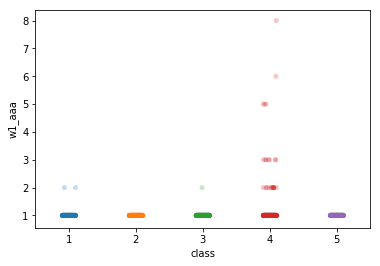

In [6]:
# (2) # Your Code goes here:
news_clean = news_raw.copy(deep= True)
news_clean = news_clean[news_clean.w10_home<100]

print(news_clean.shape)
sns.stripplot(y='w1_aaa', x = 'class', data = news_clean,jitter=True,alpha=.25)

<div align="right"><font color="blue" size="4">8.0</font></div>

(3) ***Your answer goes here:***

There are 2129 data instances in news_raw

only 2099 of them are left.

2129-2099 = 30

therefore 30 points are rejected.

This is in line with the graph, in which most of data is within 0 and 100 only a few data points are outside this range.

<div align="right"><font color="blue" size="4">2.0</font></div>

# ========== Question 1.6 --- (LEVEL 11) --- [10 marks] ==========

1. [Code] Visualise some of the outlier documents and some of the inlier ones. 
1. [Text] Comment on the observations. Also comment on whether it is appropriate to do such cleaning on just the training data or on the entire data-set (including testing).

In [7]:
# (1) # Your Code goes here:

(2) ***Your answer goes here:***

## 2. Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

<div align="right"><font color="blue" size="4">5.0/6.0</font></div>

In [8]:
# Your Code goes here:
cpu_loc = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
news_train = pd.read_csv(cpu_loc)
print(news_train.shape)
print(news_train.info())
cpu_loc = os.path.join(os.getcwd(), 'datasets', 'test_20news.csv')
news_test = pd.read_csv(cpu_loc)
print(news_test.shape)
print(news_test.info())

print(news_test.describe())
print(news_test.describe())

(2099, 521)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.3 MB
None
(128, 521)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 1910 to 2037
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 522.0 KB
None
           w1_aaa     w2_pins  w3_kmr  w4_notion   w5_queens    w6_dwyer  \
count  128.000000  128.000000   128.0      128.0  128.000000  128.000000   
mean     1.007812    1.031250     1.0        1.0    1.007812    1.015625   
std      0.088388    0.278847     0.0        0.0    0.088388    0.124507   
min      1.000000    1.000000     1.0        1.0    1.000000    1.000000   
25%      1.000000    1.000000     1.0        1.0    1.000000    1.000000   
50%      1.000000    1.000000     1.0        1.0    1.000000    1.000000   
75%      1.000000    1.000000     1.0        1.0    1.000000    1.000000   
max      2.000000    4.000000     1.0        1.0   

<div align="right"><font color="blue" size="4">5.0</font></div>

### ========== Question 2.2 --- [4 marks] ==========

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

<div align="right"><font color="blue" size="4">4.0/4.0</font></div>

(1/2) ***Your answer goes here:***

1. Each attribute is conditionally independent. A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

2. Given that we assume independence, we can calculate the probability of a data point by multipling the probability of each of its attribute. Without this assumption, we need to estimate the probability by calculating a 520-dimensional covariance matrix. 

<div align="right"><font color="blue" size="4">4.0</font></div>

### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset A. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

<div align="right"><font color="blue" size="4">8.0/8.0</font></div>

Text(0,0.5,'w273_tek')

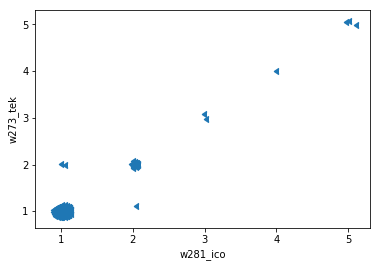

In [9]:
# (1) # Your Code goes here:
scatter_jitter(news_clean.w281_ico,news_clean.w273_tek,jitter = 0.2)
plt.xlabel('w281_ico')
plt.ylabel('w273_tek')

<div align="right"><font color="blue" size="4">3.0</font></div>

(2) ***Your answer goes here:***

Those two features show positive relation. As w181 increases, w273 increases by the same extent. 
Yes, this impacts on the the validity of naive bayes assumption becasue these two attributes are strongly correlated. Thiis is like having an attribute with double weights. 

<div align="right"><font color="blue" size="4">5.0</font></div>

### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

<div align="right"><font color="blue" size="4">6.0/7.0</font></div>

(1) ***Your answer goes here:***

A reasonable baseline classfier would be to assign each data instance to the class appears most frequently in the training set. 

In this case, the most frequent class is class 4.

<div align="right"><font color="blue" size="4">2.0</font></div>

In [10]:
# (2) # Your Code goes here:
accurateLables = news_train['class'].values


baselinePrediction = np.zeros((accurateLables.shape)) + 4

print('The accuracy rate of baseline classifier is:')
print(accuracy_score(accurateLables,baselinePrediction))

The accuracy rate of baseline classifier is:
0.21295855169128156


<div align="right"><font color="blue" size="4">4.0</font></div>

<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

<div align="right"><font color="blue" size="4">9.0/12.0</font></div>

The accuracy rate of Gaussian Naive Bayes Classifier is:
0.8780371605526441


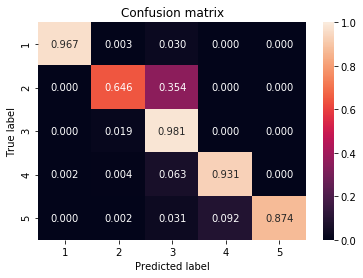

In [11]:
# (1) # Your Code goes here:
clf = GaussianNB()
X = news_train.drop('class', axis=1,inplace=False)
y = news_train['class']
clf.fit(X, y)
print('The accuracy rate of Gaussian Naive Bayes Classifier is:')
print(accuracy_score(y,clf.predict(X)))

confusionMatrix = confusion_matrix(y, clf.predict(X))
NormalisedconfusionMatrix = confusionMatrix/confusionMatrix.sum(axis=1)[:, np.newaxis]

    
plt.figure()
plot_confusion_matrix(NormalisedconfusionMatrix, classes=['1','2','3','4','5'])


<div align="right"><font color="blue" size="4">7.0</font></div>

(3) ***Your answer goes here:***

Yes it is. Because data instances belong to five different classes. There is no point in calculating recall and precision rate.

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 2.6 --- [3 marks] ==========

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

<div align="right"><font color="blue" size="4">3.0/3.0</font></div>

***Your answer goes here:***


This classisifer accurately predicted the classes 1, 3, 4, and 5, the accuracy of which is around 90%. However, this classisifer only accurately predicited 65% of class 2. This is low for training data. It also inaccuractely predicted 35% of class 2 as class 3. 


the two most frequently confused classes are "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware", which makes sense as they are both about computer hardware and they share the same vocabulary.


The "alt.atheism" is the most accurately classified topic, this is because this topic is not closely related to others and it has the most distinct vocabulary in the given topics.

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with the training data/baseline.

<div align="right"><font color="blue" size="4">9.0/12.0</font></div>

The accuracy rate of Gaussian Naive Bayes Classifier on test data set is:
0.8203125


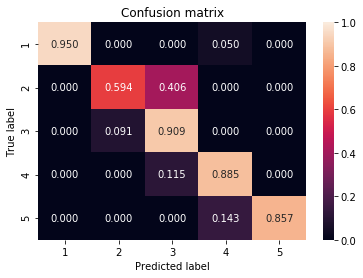

In [12]:
# (1) # Your Code goes here:
X = news_test.drop('class', axis=1,inplace=False)
y = news_test['class']

print('The accuracy rate of Gaussian Naive Bayes Classifier on test data set is:')
print(accuracy_score(y,clf.predict(X)))

confusionMatrix = confusion_matrix(y, clf.predict(X))
confusionMatrix_norm = confusionMatrix/confusionMatrix.sum(axis=1)[:, np.newaxis]
    
plt.figure()
plot_confusion_matrix(confusionMatrix_norm, classes=['1','2','3','4','5'])

<div align="right"><font color="blue" size="4">3.0</font></div>

The accuracy rate of Baseline Classifier on test data set is:
0.203125


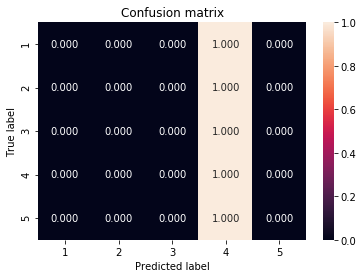

In [13]:
# (2) # Your Code goes here:
baselinePrediction1 = np.ones((y.shape))+3
ca_random = accuracy_score(y, baselinePrediction1)
cm_random = confusion_matrix(y, baselinePrediction1)
cm_norm_random = cm_random/cm_random.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm_random, classes=['1', '2', '3', '4','5'])

print('The accuracy rate of Baseline Classifier on test data set is:')
print(ca_random)

<div align="right"><font color="blue" size="4">2.0</font></div>

(3) ***Your answer goes here:***

The accuracy rate of test data is lower than training data, which means model overfits the training data. Despite the accuracy of testing data is a little bit lower than training data, gaussian classfier still predicts class 1,3,4,5 correctly whereas baseline classifier's accuracy for class four is 100% and for other classes is 0%.

<div align="right"><font color="blue" size="4">4.0</font></div>

### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

In [14]:
# (1) # Your Code goes here:

(2) ***Your answer goes here:***

### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***